## Varun Marthand

### Web-Scrapping

In [100]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [101]:
def get_soup(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text,'html.parser')
    return soup

In [102]:
reviews = []
def get_review(soup): 
    item = soup.find_all('div',{'data-hook':'review'})
    for x in item:
        body = x.find('span',{'data-hook':'review-body'}).text.strip()
        reviews.append(body)

In [ ]:
for x in range(1,10000):
    soup = get_soup(f'https://www.amazon.in/Apple-iPhone-13-128GB-Midnight/product-reviews/B09G9HD6PD/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=helpful&pageNumber={x}')
    get_review(soup)
    if not soup.find('li',{'class':'a-disabled a-last'}):
        pass
    else:
        break

In [11]:
reviews = pd.DataFrame(reviews,columns=['reviews'])
reviews

,reviews
0,You should be a bigggggg bot to buy this phone...
1,There was a hairline scratch on the screen whi...
2,Just but iphone 12!It’s not worth the money!Un...
3,i am poor and i cant afford it lmao xdxdxdxdxd...
4,I do not have money that I can get a phone but...
...,...
220,Today I got my iphone 13 Starlight and guess w...
221,My dream is to buy this phone but pocket is so...
222,Good Phone
223,As this iPhone offers well stable iOS and one ...


In [12]:
reviews.to_excel('Iphone13_reviews.xlsx')

In [13]:
df = pd.read_excel('Iphone13_reviews.xlsx',index_col=0)

In [14]:
pd.set_option('max_colwidth',0)
df

,reviews
0,You should be a bigggggg bot to buy this phoneYou could get iPhone 12 Pro that’s the best 😂
1,"There was a hairline scratch on the screen which is not clearly visible directly. When we tried contacting Amazon for the replacement, they asked us to connect to apple and when connected to apple, they asked to connect with Amazon. Blame game begins and we end up paying the price. Awfull service. I am going to tag on the social media both Amazon and apple. Such a big scam"
2,"Just but iphone 12!It’s not worth the money!Unless ur from BJP or something where you’re full with corrupt money, then go ahead."
3,i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i have my chemistry exam on manday and cant study mole concept and got bored thats why i came here to write this review if you read this review til here very good you justt wasted your time now go and do something productive :)
4,I do not have money that I can get a phone but I have a dream to get a phone which will definitely be fulfilled one day
...,...
220,"Today I got my iphone 13 Starlight and guess what it was just extra mind-blowing than my imagination.. just loved the way of packaging and delivery..One more thing is that we are confused sometimes because of the negative comments like fake phone, broken, clone phone received... Believe me just ignore those stupid negative comment section , & just go for it without any hesitation . Because Nothing fraud is going to happen with you . It's very secure ,trusty . Go for it"
221,My dream is to buy this phone but pocket is so tight . Just a marichika to me.Every day I think to have this .
222,Good Phone
223,As this iPhone offers well stable iOS and one of the best hardwares this is a nice phone to buy


### Sentiment Analysis

In [44]:
import pandas as pd
import numpy as np

In [45]:
aff = pd.read_csv('Afinn.csv', encoding = 'latin_1')

In [46]:
aff

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [15]:
df

,reviews
0,You should be a bigggggg bot to buy this phoneYou could get iPhone 12 Pro that’s the best 😂
1,"There was a hairline scratch on the screen which is not clearly visible directly. When we tried contacting Amazon for the replacement, they asked us to connect to apple and when connected to apple, they asked to connect with Amazon. Blame game begins and we end up paying the price. Awfull service. I am going to tag on the social media both Amazon and apple. Such a big scam"
2,"Just but iphone 12!It’s not worth the money!Unless ur from BJP or something where you’re full with corrupt money, then go ahead."
3,i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i have my chemistry exam on manday and cant study mole concept and got bored thats why i came here to write this review if you read this review til here very good you justt wasted your time now go and do something productive :)
4,I do not have money that I can get a phone but I have a dream to get a phone which will definitely be fulfilled one day
...,...
220,"Today I got my iphone 13 Starlight and guess what it was just extra mind-blowing than my imagination.. just loved the way of packaging and delivery..One more thing is that we are confused sometimes because of the negative comments like fake phone, broken, clone phone received... Believe me just ignore those stupid negative comment section , & just go for it without any hesitation . Because Nothing fraud is going to happen with you . It's very secure ,trusty . Go for it"
221,My dream is to buy this phone but pocket is so tight . Just a marichika to me.Every day I think to have this .
222,Good Phone
223,As this iPhone offers well stable iOS and one of the best hardwares this is a nice phone to buy


In [27]:
df['reviews'] = df['reviews'].astype('str') 

In [28]:
review1 = [x.strip().lower() for x in df['reviews']]
review_1 = [x for x in review1 if x]

In [30]:
review_1 == review1

True

In [31]:
review_1

['you should be a bigggggg bot to buy this phoneyou could get iphone 12 pro that’s the best 😂',
 'there was a hairline scratch on the screen which is not clearly visible directly. when we tried contacting amazon for the replacement, they asked us to connect to apple and when connected to apple, they asked to connect with amazon. blame game begins and we end up paying the price. awfull service. i am going to tag on the social media both amazon and apple. such a big scam',
 'just but iphone 12!it’s not worth the money!unless ur from bjp or something where you’re full with corrupt money, then go ahead.',
 'i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i have my chemistry exam on  manday and cant study mole concept and got bored thats why i came here to write this review if you read this review til here very good you justt wasted your time now go and do something productive :)',
 'i do 

In [32]:
import nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
from nltk.tokenize import TweetTokenizer

In [35]:
from nltk import tokenize

In [36]:
tt = TweetTokenizer(strip_handles= True)

In [37]:
clean_sent = tt.tokenize(' '.join(review_1))
' '.join(clean_sent)

'you should be a bigggggg bot to buy this phoneyou could get iphone 12 pro that ’ s the best 😂 there was a hairline scratch on the screen which is not clearly visible directly . when we tried contacting amazon for the replacement , they asked us to connect to apple and when connected to apple , they asked to connect with amazon . blame game begins and we end up paying the price . awfull service . i am going to tag on the social media both amazon and apple . such a big scam just but iphone 12 ! it ’ s not worth the money ! unless ur from bjp or something where you ’ re full with corrupt money , then go ahead . i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i have my chemistry exam on manday and cant study mole concept and got bored thats why i came here to write this review if you read this review til here very good you justt wasted your time now go and do something productive :) i do

In [38]:
clean_sent = tokenize.sent_tokenize(' '.join(clean_sent))
clean_sent

['you should be a bigggggg bot to buy this phoneyou could get iphone 12 pro that ’ s the best 😂 there was a hairline scratch on the screen which is not clearly visible directly .',
 'when we tried contacting amazon for the replacement , they asked us to connect to apple and when connected to apple , they asked to connect with amazon .',
 'blame game begins and we end up paying the price .',
 'awfull service .',
 'i am going to tag on the social media both amazon and apple .',
 'such a big scam just but iphone 12 !',
 'it ’ s not worth the money !',
 'unless ur from bjp or something where you ’ re full with corrupt money , then go ahead .',
 'i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i have my chemistry exam on manday and cant study mole concept and got bored thats why i came here to write this review if you read this review til here very good you justt wasted your time now go an

In [72]:
sent = pd.DataFrame(clean_sent, columns= ['Sentences'])
sent

,Sentences
0,you should be a bigggggg bot to buy this phoneyou could get iphone 12 pro that ’ s the best 😂 there was a hairline scratch on the screen which is not clearly visible directly .
1,"when we tried contacting amazon for the replacement , they asked us to connect to apple and when connected to apple , they asked to connect with amazon ."
2,blame game begins and we end up paying the price .
3,awfull service .
4,i am going to tag on the social media both amazon and apple .
...,...
364,because nothing fraud is going to happen with you .
365,"it's very secure , trusty ."
366,go for it my dream is to buy this phone but pocket is so tight .
367,just a marichika to me.every day i think to have this .


In [73]:
affinity = aff.set_index('word')['value'].to_dict()

In [74]:
affinity

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [75]:
import spacy

In [76]:
nlp = spacy.load('en_core_web_sm')

In [77]:
def cal_score(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for x in sentence:
            sent_score += affinity.get(x.lemma_,0)
    return sent_score

In [78]:
cal_score('sad')

-2

In [80]:
sent['Sentiment'] = sent['Sentences'].apply(cal_score)

In [81]:
sent

,Sentences,Sentiment
0,you should be a bigggggg bot to buy this phoneyou could get iphone 12 pro that ’ s the best 😂 there was a hairline scratch on the screen which is not clearly visible directly .,4
1,"when we tried contacting amazon for the replacement , they asked us to connect to apple and when connected to apple , they asked to connect with amazon .",0
2,blame game begins and we end up paying the price .,-3
3,awfull service .,0
4,i am going to tag on the social media both amazon and apple .,0
...,...,...
364,because nothing fraud is going to happen with you .,-4
365,"it's very secure , trusty .",2
366,go for it my dream is to buy this phone but pocket is so tight .,1
367,just a marichika to me.every day i think to have this .,0


In [83]:
sent['words'] = sent['Sentences'].str.split().apply(len)

In [84]:
sent

,Sentences,Sentiment,words
0,you should be a bigggggg bot to buy this phoneyou could get iphone 12 pro that ’ s the best 😂 there was a hairline scratch on the screen which is not clearly visible directly .,4,36
1,"when we tried contacting amazon for the replacement , they asked us to connect to apple and when connected to apple , they asked to connect with amazon .",0,29
2,blame game begins and we end up paying the price .,-3,11
3,awfull service .,0,3
4,i am going to tag on the social media both amazon and apple .,0,14
...,...,...,...
364,because nothing fraud is going to happen with you .,-4,10
365,"it's very secure , trusty .",2,6
366,go for it my dream is to buy this phone but pocket is so tight .,1,16
367,just a marichika to me.every day i think to have this .,0,12


In [86]:
sent[sent['Sentiment'] == sent['Sentiment'].min()]

,Sentences,Sentiment,words
118,initially i was worried about this costly phone to order online but then i look up the reviews and then i just ordered this phone.today morning i received my phone .,-5,31


In [88]:
sent[sent['Sentiment'] == sent['Sentiment'].max()]

,Sentences,Sentiment,words
274,"i was using iphone 12 but now i had upgrade to 13 thanks amazon thank a lot it's good phone more stora it's camera and well only nice phone iphone 13 it's better and all good apple i phone 13 having lot of good features but difficulties for sr people .. missing home button , no call recording , need to buy c type charger etc .. nan battery camera smooth touch awesome white colour best colour i am very impressed with the quality of the product .. truely amazed with its performance , though i miss my second kidney ... still happy and surviving ... go for it today ... best batteryyy life everr 👍 🏻 👍 🏻 👍 🏻 👍 🏻 go for it .. i m in love with iphone 13osm phone with osm battery life ✌ ️ the media could not be loaded .",32,148


In [90]:
pd.options.display.max_colwidth = 1000

In [91]:
import seaborn as sns

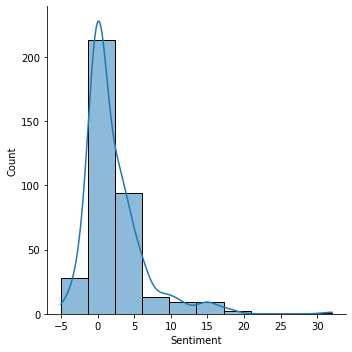

In [96]:
sns.displot(sent['Sentiment'], kde = True, bins = 10)

<AxesSubplot:xlabel='words', ylabel='Sentiment'>

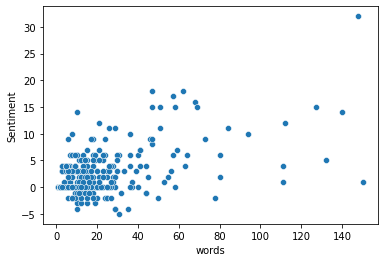

In [98]:
sns.scatterplot(y='Sentiment',x='words',data=sent)

In [99]:
sent[sent['Sentiment'] > 5]

,Sentences,Sentiment,words
14,"i was very sceptical about the charging speed of an iphone because in iqoo i had 66w fast charger where as for iphone i had to buy 20w separate fast charger for 1800rs , but charging speed isn ’ t disappointing.display quality is truly flagship level and i ’ m quite a fan of the small 6.1 display believe it or not , being able to reach the top of display with just one hand is very helpful , build quality is great .",11,84
33,the second is an improved camera.this two factor really matter in our day to day life and regular useno any other things are improved like a screen and chip performanceoverall soft update for 12 the media could not be loaded .,7,41
34,iphone is so good but my phone is four times hang so i am facing some difficulties please solve problems if you ’ re moving from iphone 11 or previous gen then it ’ s the best iphone ever .,6,40
54,i switched from android to ios.there are so many things you can not do on iphone.if you want a phone which have good looks and phone doesn ’ t do anything else then you can buy iphone.battery life is fine.charging speed is also fine.camera quality is also fine but some of android phones with this range have better camera quality than this one .,6,64
56,"same dolby and oled display feels premium in iphone.didn ’ t explore much on apple eco system , how ever i understood that you need to spend some extra bugs than usual if you want to be a premium user of apple eco system.nothing comes for free here , in fact you would loose the freedom of being an android user ( less customisation and no side loaders ) in a good way , if you respect your privacy , security and getting premium services in the market you should choose iphone.new users are good to go for iphone 13 with few extra grands with the current offers , you will get extra features that are missing in 12.12 users forget about upgrading to 13 it will be a joke for you , it won ’ t worth it .",14,140
84,"i could have gone for pro max but more than 1.5 l budget is way too much for me :-) * good battery back-up ( with low battery mode always on , 5 hours of talk-time , around 2 hours of twitter and 2 hours of whatsapp usage , 1 hour of songs listening , 1 hour of rummy / candy crush games and notification of all these items , the battery comes for more than 24 hours for me ) * getting charged quickly from 20 % to 100 % within 2 hours * perfect camera and i love that ' live ' photo option * body design is awesome .",12,112
93,highly recommended to buy this phone as i have switched from android to ios but still i am feeling very comfortable to use this phone as it is user friendly .,6,31
94,"amazon sells original product and keeps you updated about the delivery unlike other marketplaces and also provides great discounts which is amazing , so for the one's planning to buy can go ahead and choose amazon to buy an iphone .",7,41
109,"headset of my iphone is not workingwhat can i do iphone 13 awesome phone , screen ultra clear , sound very clear too good , amazon delivery was awesome as always , iphone rocks.phone is having 60hz but it doesn ’ t look like that , easily compare to 90hz phone kudos to apple regarding the phone .",15,58
120,i am totally happy with the purchase and i can now recommend this phone to anyone who wants to buy this online by applying the offers you are get .,6,30
